In [1]:
from gdeltdoc import GdeltDoc, Filters
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

In [2]:
#Import list of themes from the source, GDELT
themes_arr = np.loadtxt('../Data/GDELT_data/LOOKUP-GKGTHEMES.TXT', dtype = str)
filtered = [(a,b) for (a,b) in themes_arr if 'DISASTER' in a and 'TAX' not in a and int(b) > 300000]

In [3]:
#List of thresholded themes
print(filtered)
print(len(filtered))

[('MANMADE_DISASTER_IMPLIED', '221229073'), ('NATURAL_DISASTER', '72002253'), ('WB_2166_HEALTH_EMERGENCY_PREPAREDNESS_AND_DISASTER_RESPONSE', '46628648'), ('DISASTER_FIRE', '18136739'), ('MANMADE_DISASTER', '15334942'), ('NATURAL_DISASTER_ICE', '11025516'), ('NATURAL_DISASTER_EARTHQUAKE', '7086203'), ('NATURAL_DISASTER_FLOOD', '6495128'), ('NATURAL_DISASTER_FLOODING', '6207184'), ('NATURAL_DISASTER_HURRICANE', '5336512'), ('NATURAL_DISASTER_FLOODS', '4820227'), ('NATURAL_DISASTER_FLOODED', '4279818'), ('NATURAL_DISASTER_DROUGHT', '3962460'), ('NATURAL_DISASTER_HEAVY_RAIN', '2539450'), ('NATURAL_DISASTER_DROWNED', '2470994'), ('NATURAL_DISASTER_EARTHQUAKES', '1984203'), ('NATURAL_DISASTER_EROSION', '1980096'), ('NATURAL_DISASTER_WILDFIRE', '1614522'), ('MANMADE_DISASTER_TRAFFIC_ACCIDENT', '1612877'), ('NATURAL_DISASTER_TSUNAMI', '1543881'), ('NATURAL_DISASTER_DROWNING', '1527800'), ('NATURAL_DISASTER_NATURAL_DISASTERS', '1519362'), ('NATURAL_DISASTER_STRONG_WINDS', '1515370'), ('NATURAL

In [4]:
gd = GdeltDoc()

In [5]:
final_article_counts = pd.DataFrame()
f = Filters(
        start_date = "2017-01-01",
        end_date = "2022-11-10",
        theme = 'MANMADE_DISASTER_IMPLIED',
    )

timeline = gd.timeline_search("timelinevolraw", f)
final_article_counts = timeline[['datetime', 'All Articles']].copy()

In [6]:
print(len(final_article_counts))
final_article_counts.head()

2137


,datetime,All Articles
0,2017-01-01 00:00:00+00:00,427906
1,2017-01-02 00:00:00+00:00,592774
2,2017-01-03 00:00:00+00:00,757916
3,2017-01-04 00:00:00+00:00,822862
4,2017-01-05 00:00:00+00:00,830028


In [7]:
for spec_theme, b in filtered:
    #Solved an issue wtih the theme not reaeding correctly, dunno why it works
    spec_theme = str(spec_theme)
    
    #Generate filter
    f = Filters(
        start_date = "2017-01-01",
        end_date = "2022-11-10",
        theme = spec_theme,
    )

    # Get a timeline of the number of articles matching the filters
    #Try except needed as some were throwing 'Query too long or too short' and didn't know how to fix
    try:
        timeline = gd.timeline_search("timelinevolraw", f)
    except:
        continue

    #Rename column to theme, append the column to the dataframe
    timeline.rename(columns={'Article Count': spec_theme}, inplace=True)
    final_article_counts = pd.concat([final_article_counts, timeline[spec_theme]], axis = 1)


In [8]:
final_article_counts.head()

,datetime,All Articles,MANMADE_DISASTER_IMPLIED,WB_2166_HEALTH_EMERGENCY_PREPAREDNESS_AND_DISASTER_RESPONSE,DISASTER_FIRE,NATURAL_DISASTER_ICE,NATURAL_DISASTER_EARTHQUAKE,NATURAL_DISASTER_FLOOD,NATURAL_DISASTER_FLOODING,NATURAL_DISASTER_HURRICANE,...,NATURAL_DISASTER_FRIGID,MANMADE_DISASTER_POWER_OUTAGE,NATURAL_DISASTER_HEATWAVE,NATURAL_DISASTER_AVALANCHES,NATURAL_DISASTER_TORRENTIAL_RAIN,SELF_IDENTIFIED_ENVIRON_DISASTER,NATURAL_DISASTER_ERUPTIONS,NATURAL_DISASTER_TWISTER,NATURAL_DISASTER_BUSHFIRE,NATURAL_DISASTER_FLASH_FLOOD
0,2017-01-01 00:00:00+00:00,427906,87559,3363,11765,4972,1956,1689,1309,459,...,384,127,22,126,132,43,55,95,65,40
1,2017-01-02 00:00:00+00:00,592774,109720,4412,11562,6742,3079,1863,1787,589,...,259,157,47,129,54,67,72,78,47,54
2,2017-01-03 00:00:00+00:00,757916,129371,5765,14952,8754,3451,3366,3629,1222,...,385,153,40,257,54,105,116,235,249,94
3,2017-01-04 00:00:00+00:00,822862,134633,6477,12470,9553,5877,4216,2672,2723,...,447,293,73,614,117,84,243,136,199,40
4,2017-01-05 00:00:00+00:00,830028,143110,6919,11297,11397,3690,5559,4315,1679,...,650,194,64,874,64,97,160,181,177,867


**Overview:** 92 total columns (not including datetime/ All articles) means that 92 different themes went through correclty

In [9]:
final_article_counts.columns

Index(['datetime', 'All Articles', 'MANMADE_DISASTER_IMPLIED',
       'WB_2166_HEALTH_EMERGENCY_PREPAREDNESS_AND_DISASTER_RESPONSE',
       'DISASTER_FIRE', 'NATURAL_DISASTER_ICE', 'NATURAL_DISASTER_EARTHQUAKE',
       'NATURAL_DISASTER_FLOOD', 'NATURAL_DISASTER_FLOODING',
       'NATURAL_DISASTER_HURRICANE', 'NATURAL_DISASTER_FLOODS',
       'NATURAL_DISASTER_FLOODED', 'NATURAL_DISASTER_DROUGHT',
       'NATURAL_DISASTER_HEAVY_RAIN', 'NATURAL_DISASTER_DROWNED',
       'NATURAL_DISASTER_EARTHQUAKES', 'NATURAL_DISASTER_EROSION',
       'NATURAL_DISASTER_WILDFIRE', 'MANMADE_DISASTER_TRAFFIC_ACCIDENT',
       'NATURAL_DISASTER_TSUNAMI', 'NATURAL_DISASTER_DROWNING',
       'NATURAL_DISASTER_NATURAL_DISASTERS', 'NATURAL_DISASTER_STRONG_WINDS',
       'NATURAL_DISASTER_LANDSLIDES', 'NATURAL_DISASTER_WILDFIRES',
       'MANMADE_DISASTER_ROAD_ACCIDENT', 'NATURAL_DISASTER_AVALANCHE',
       'NATURAL_DISASTER_VOLCANO', 'NATURAL_DISASTER_HURRICANES',
       'NATURAL_DISASTER_CYCLONE', 'NATURAL_DI

In [10]:
len(final_article_counts)

2137

Text(0.5, 1.0, 'MANMADE_DISASTER_OIL_SPILL')

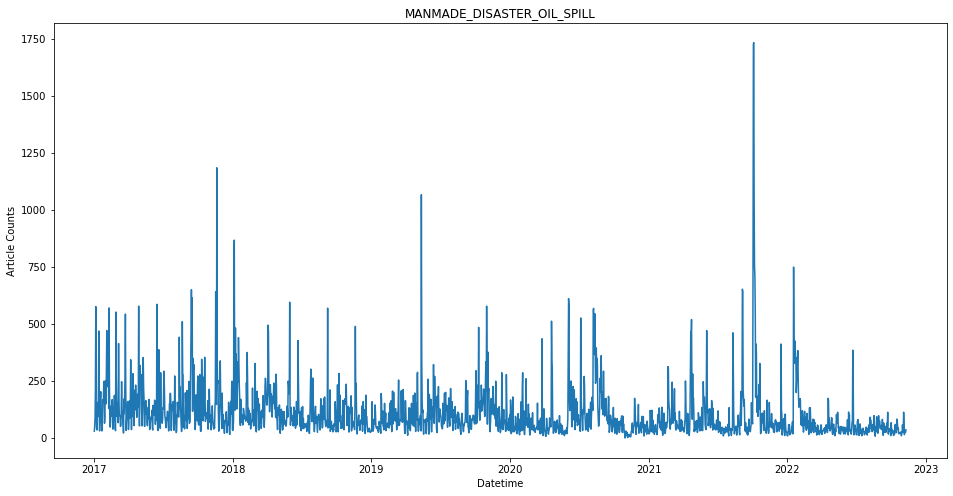

In [12]:
plt.figure(figsize = (16,8))
plt.plot(final_article_counts['datetime'], final_article_counts['MANMADE_DISASTER_OIL_SPILL'])
plt.xlabel('Datetime')
plt.ylabel('Article Counts')
plt.title('MANMADE_DISASTER_OIL_SPILL')

In [ ]:
final_article_counts.to_csv('../Darticle_counts_disasters.csv')